### **Section 1: Load the Dataset**

In [ ]:
# Student Code: Load the dataset
import pandas as pd

# Example: Load your dataset (replace with the actual dataset path or URL)
df = pd.read_csv("/content/Copy of product_classification_expanded.csv")

# Display the first few rows to understand the structure
df.head()

,Product Category,Product Description
0,Toys,"Educational building blocks set,\nideal for ki..."
1,Books,Science fiction bestseller with futuristic the...
2,Books,"Self-improvement book for personal growth,\nin..."
3,Electronics,"Wireless earbuds with noise cancellation,\nlon..."
4,Electronics,"Wireless earbuds with noise cancellation,\nlon..."


### **Section 2: Perform Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Category     2500 non-null   object
 1   Product Description  2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB
None
              Product Category  \
count                     2500   
unique                      15   
top     Beauty & Personal Care   
freq                       178   

                                      Product Description  
count                                                2500  
unique                                                 90  
top     Organic skincare set including cleanser,\nmois...  
freq                                                   44  


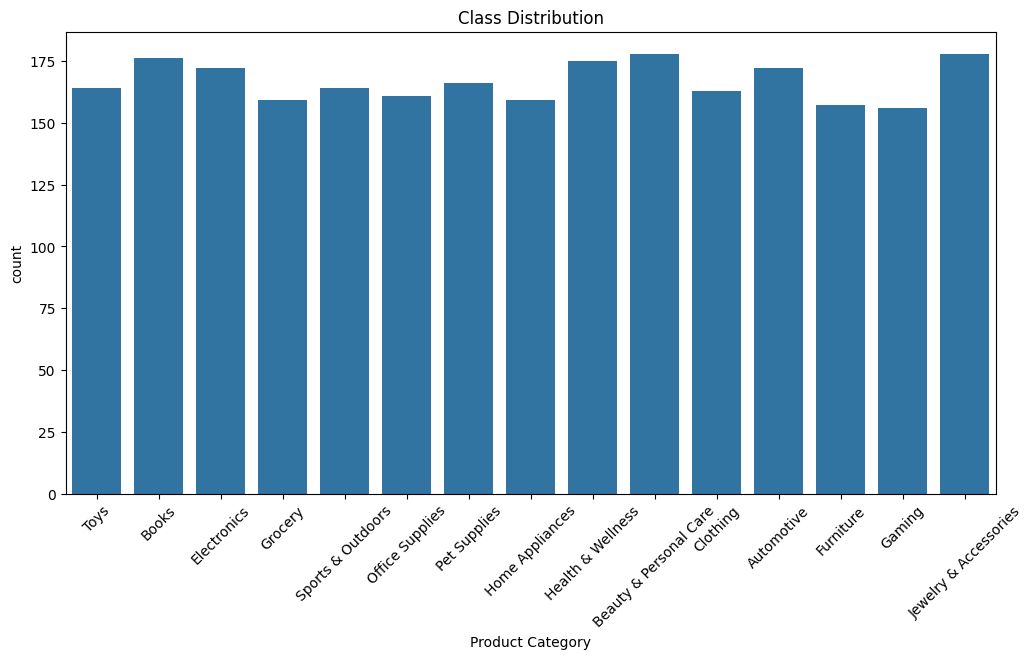

Product Category       0
Product Description    0
dtype: int64


In [ ]:
# Student Code: Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (if it's a classification task)
plt.figure(figsize=(12, 6))  # Adjust size based on the number of classes
sns.countplot(x='Product Category', data=df)
plt.title("Class Distribution")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

# Check for missing values
print(df.isnull().sum())

### **Section 3: Perform Text Processing on Dataset**

In [ ]:
# Student Code: Text Processing (Cleaning the data)
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\n', '', text)
    text = text.lower()
    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['Product Description'].apply(clean_text)

# Display cleaned text
df[['Product Description', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Product Description,cleaned_text
0,"Educational building blocks set,\nideal for ki...",educational building blocks setideal for kids ...
1,Science fiction bestseller with futuristic the...,science fiction bestseller with futuristic the...
2,"Self-improvement book for personal growth,\nin...",selfimprovement book for personal growthinspir...
3,"Wireless earbuds with noise cancellation,\nlon...",wireless earbuds with noise cancellationlong b...
4,"Wireless earbuds with noise cancellation,\nlon...",wireless earbuds with noise cancellationlong b...


### **Section 4: Generate NLP-Based Features**

In [ ]:
# Student Code: Generate NLP-based features
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    return df

# Generate NLP features
df = generate_nlp_features(df)
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()

,char_count,word_count,avg_word_length,stopword_count,htag_count
0,205,26,6.884615,5,0
1,255,29,7.827586,8,0
2,255,29,7.827586,8,0
3,221,32,5.937500,10,0
4,221,32,5.937500,10,0


In [ ]:
df

,Product Category,Product Description,cleaned_text,char_count,word_count,avg_word_length,stopword_count,htag_count
0,Toys,"Educational building blocks set,\nideal for ki...",educational building blocks setideal for kids ...,205,26,6.884615,5,0
1,Books,Science fiction bestseller with futuristic the...,science fiction bestseller with futuristic the...,255,29,7.827586,8,0
2,Books,"Self-improvement book for personal growth,\nin...",selfimprovement book for personal growthinspir...,255,29,7.827586,8,0
3,Electronics,"Wireless earbuds with noise cancellation,\nlon...",wireless earbuds with noise cancellationlong b...,221,32,5.937500,10,0
4,Electronics,"Wireless earbuds with noise cancellation,\nlon...",wireless earbuds with noise cancellationlong b...,221,32,5.937500,10,0
...,...,...,...,...,...,...,...,...
2495,Furniture,"Ergonomic office chair with lumbar support,\na...",ergonomic office chair with lumbar supportadju...,222,31,6.193548,9,0
2496,Furniture,"Ergonomic office chair with lumbar support,\na...",ergonomic office chair with lumbar supportadju...,222,31,6.193548,9,0
2497,Toys,"Soft plush teddy bear,\nperfect for gifting an...",soft plush teddy bearperfect for gifting and k...,205,26,6.884615,5,0
2498,Pet Supplies,"Dog food with high-protein formula,\ncontains ...",dog food with highprotein formulacontains esse...,243,32,6.625000,8,0


### **Section 5: Generate Bag of Words, TFIDF, and FastText Features**

In [ ]:
# Student Code: Generate Bag of Words, TFIDF, and FastText features
!pip install fasttext
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import os

# Download the pre-trained FastText model if it doesn't exist
if not os.path.exists('cc.en.300.bin'):
    !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
    !gunzip cc.en.300.bin.gz

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings (example using pre-trained FastText model)
ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)
fasttext_embeddings = df['fasttext_embeddings']



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313471 sha256=a7b0f47d0cb34edc03f8b95e386685677709b8a0c96e3441d28f3d002de7d956
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext
--2025-03-16 17:00:57--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.70, 13.227.219.59, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45035

In [ ]:
# X_tfidf
#fasttext_embeddings
#X_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 62510 stored elements and shape (2500, 412)>

### **Section 6: Train All Supervised Models on NLP-Based Features**

**Random Forest**

In [ ]:
# Student Code: Train Models on NLP Features (char_count, word_count, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Product Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#ML models with nlp features

In [ ]:
!pip install tabulate
import pandas as pd
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import joblib

# Example dataset
# df = pd.read_csv('your_data.csv')
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Product Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Convert text to TF-IDF features
# tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed ; not needed for nlp features
# X_tfidf = tfidf.fit_transform(X) # not needed for nlp features

# Split data
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    joblib.dump(model, f'{name}_with nlp features.pkl')
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"{name} Results:\n")
    print(classification_report(y_test, y_pred))

# Create a summary table
summary = pd.DataFrame({model: results[model]['weighted avg'] for model in results}).T
summary = summary[['precision', 'recall', 'f1-score']]

# Display as a table
print("\nModel Comparison:")
print(tabulate(summary, headers='keys', tablefmt='grid'))


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:

                        precision    recall  f1-score   support

            Automotive       1.00      1.00      1.00        32
Beauty & Personal Care       1.00      1.00      1.00        35
                 Books       1.00      1.00      1.00        36
              Clothing       1.00      1.00      1.00        43
           Electronics       1.00      1.00      1.00        28
             Furniture       1.00      1.00      1.00        35
                Gaming       1.00      1.00      1.00        32
               Grocery       1.00      1.00      1.00        33
     Health & Wellness       1.00      1.00      1.00        34
       Home Appliances       1.00      1.00      1.00        41
 Jewelry & Accessories       1.00      1.00      1.00        34
       Office Supplies       1.00      1.00      1.00        33
          Pet Supplies       1.00      1.00      1.00        34
     Sports & Outdoors       1.00      1.00      1.00        24
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Results:

                        precision    recall  f1-score   support

            Automotive       1.00      1.00      1.00        32
Beauty & Personal Care       1.00      1.00      1.00        35
                 Books       1.00      1.00      1.00        36
              Clothing       1.00      1.00      1.00        43
           Electronics       1.00      1.00      1.00        28
             Furniture       1.00      1.00      1.00        35
                Gaming       1.00      1.00      1.00        32
               Grocery       1.00      1.00      1.00        33
     Health & Wellness       1.00      1.00      1.00        34
       Home Appliances       1.00      1.00      1.00        41
 Jewelry & Accessories       1.00      1.00      1.00        34
       Office Supplies       1.00      1.00      1.00        33
          Pet Supplies       1.00      1.00      1.00        34
     Sports & Outdoors       1.00      1.00      1.00        24
               

### **Sections 7-9: Train Models on BoW, TFIDF, and FastText Features**

In [ ]:
def train(X_train, X_test, y_train, y_test,feature):
  models = {
      'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
      'SVM': SVC(kernel='linear'),
      'Decision Tree': DecisionTreeClassifier(),
      'KNN': KNeighborsClassifier(),
      'Random Forest': RandomForestClassifier()
  }

  # Train and evaluate models
  results = {}
  for name, model in models.items():
      print(f"Training {name}...")
      model.fit(X_train, y_train)
      joblib.dump(model, f'{name}_with {feature} features.pkl')
      y_pred = model.predict(X_test)
      results[name] = classification_report(y_test, y_pred, output_dict=True)
      print(f"{name} Results:\n")
      print(classification_report(y_test, y_pred))

In [ ]:
# Train models on Bag of Words (BoW), TFIDF, and FastText features
# Example for Bag of Words
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
# Create a summary table
feature = "bow"
train(X_train, X_test, y_train, y_test, feature)
summary1 = pd.DataFrame({model: results[model]['weighted avg'] for model in models}).T
summary1 = summary1[['precision', 'recall', 'f1-score']]
# Display as a table
print("\nModel Comparison for bag of words")
print(tabulate(summary1, headers='keys', tablefmt='grid'))


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:

                        precision    recall  f1-score   support

            Automotive       1.00      1.00      1.00        32
Beauty & Personal Care       1.00      1.00      1.00        35
                 Books       1.00      1.00      1.00        36
              Clothing       1.00      1.00      1.00        43
           Electronics       1.00      1.00      1.00        28
             Furniture       1.00      1.00      1.00        35
                Gaming       1.00      1.00      1.00        32
               Grocery       1.00      1.00      1.00        33
     Health & Wellness       1.00      1.00      1.00        34
       Home Appliances       1.00      1.00      1.00        41
 Jewelry & Accessories       1.00      1.00      1.00        34
       Office Supplies       1.00      1.00      1.00        33
          Pet Supplies       1.00      1.00      1.00        34
     Sports & Outdoors       1.00      1.00      1.00        24
         

In [ ]:
# Repeat for TFIDF and FastText embeddings
# Example for TFIDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
feature = "tfidf"
train(X_train, X_test, y_train, y_test, feature)
# Create a summary table
summary2 = pd.DataFrame({model: results[model]['weighted avg'] for model in models}).T
summary2 = summary2[['precision', 'recall', 'f1-score']]

# Display as a table
print("\nModel Comparison for tfidf:")
print(tabulate(summary2, headers='keys', tablefmt='grid'))



Training Logistic Regression...
Logistic Regression Results:

                        precision    recall  f1-score   support

            Automotive       1.00      1.00      1.00        32
Beauty & Personal Care       1.00      1.00      1.00        35
                 Books       1.00      1.00      1.00        36
              Clothing       1.00      1.00      1.00        43
           Electronics       1.00      1.00      1.00        28
             Furniture       1.00      1.00      1.00        35
                Gaming       1.00      1.00      1.00        32
               Grocery       1.00      1.00      1.00        33
     Health & Wellness       1.00      1.00      1.00        34
       Home Appliances       1.00      1.00      1.00        41
 Jewelry & Accessories       1.00      1.00      1.00        34
       Office Supplies       1.00      1.00      1.00        33
          Pet Supplies       1.00      1.00      1.00        34
     Sports & Outdoors       1.00      1.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


SVM Results:

                        precision    recall  f1-score   support

            Automotive       1.00      1.00      1.00        32
Beauty & Personal Care       1.00      1.00      1.00        35
                 Books       1.00      1.00      1.00        36
              Clothing       1.00      1.00      1.00        43
           Electronics       1.00      1.00      1.00        28
             Furniture       1.00      1.00      1.00        35
                Gaming       1.00      1.00      1.00        32
               Grocery       1.00      1.00      1.00        33
     Health & Wellness       1.00      1.00      1.00        34
       Home Appliances       1.00      1.00      1.00        41
 Jewelry & Accessories       1.00      1.00      1.00        34
       Office Supplies       1.00      1.00      1.00        33
          Pet Supplies       1.00      1.00      1.00        34
     Sports & Outdoors       1.00      1.00      1.00        24
                  Toys   

In [ ]:
# Example for FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
feature = "fasttext"
train(X_train, X_test, y_train, y_test, feature)
# Create a summary table
summary3 = pd.DataFrame({model: results[model]['weighted avg'] for model in models}).T
summary3 = summary3[['precision', 'recall', 'f1-score']]

# Display as a table
print("\nModel Comparison for fasttext:")
print(tabulate(summary3, headers='keys', tablefmt='grid'))

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:

                        precision    recall  f1-score   support

            Automotive       1.00      1.00      1.00        32
Beauty & Personal Care       1.00      1.00      1.00        35
                 Books       1.00      1.00      1.00        36
              Clothing       1.00      1.00      1.00        43
           Electronics       1.00      1.00      1.00        28
             Furniture       1.00      1.00      1.00        35
                Gaming       1.00      1.00      1.00        32
               Grocery       1.00      1.00      1.00        33
     Health & Wellness       1.00      1.00      1.00        34
       Home Appliances       1.00      1.00      1.00        41
 Jewelry & Accessories       1.00      1.00      1.00        34
       Office Supplies       1.00      1.00      1.00        33
          Pet Supplies       1.00      1.00      1.00        34
     Sports & Outdoors       1.00      1.00      1.00        24
         

### **Section 10: Train Models on All Combined Features with TFIDF**

In [ ]:
# Student Code: Train Models on Combined Features (NLP + TFIDF)
from scipy.sparse import hstack

# Combine NLP features and TFIDF features
X_combined = hstack([X, X_tfidf])

# Train model and evaluate
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
feature = "Combined Features with TFIDF"
train(X_train, X_test, y_train, y_test, feature)
summary1 = pd.DataFrame({model: results[model]['weighted avg'] for model in models}).T
summary1 = summary1[['precision', 'recall', 'f1-score']]
# Display as a table
print("\nModel Comparison for Combined Features (NLP + TFIDF)")
print(tabulate(summary1, headers='keys', tablefmt='grid'))

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:

                        precision    recall  f1-score   support

            Automotive       1.00      1.00      1.00        32
Beauty & Personal Care       1.00      1.00      1.00        35
                 Books       1.00      1.00      1.00        36
              Clothing       1.00      1.00      1.00        43
           Electronics       1.00      1.00      1.00        28
             Furniture       1.00      1.00      1.00        35
                Gaming       1.00      1.00      1.00        32
               Grocery       1.00      1.00      1.00        33
     Health & Wellness       1.00      1.00      1.00        34
       Home Appliances       1.00      1.00      1.00        41
 Jewelry & Accessories       1.00      1.00      1.00        34
       Office Supplies       1.00      1.00      1.00        33
          Pet Supplies       1.00      1.00      1.00        34
     Sports & Outdoors       1.00      1.00      1.00        24
         

In [ ]:
hstack([X, X_tfidf])

<COOrdinate sparse matrix of dtype 'float64'
	with 812510 stored elements and shape (2500, 712)>

### **Section 11: Save the Model and Make Predictions on Real-World Input**

In [ ]:
import os
from scipy.sparse import hstack, csr_matrix
import joblib
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

# Load data (for fitting BoW and TFIDF)
#df = pd.read_csv('/content/data.csv')  # Replace with actual data path
#df['cleaned_text'] = df['text'].str.lower()

# Initialize vectorizers (reduce max_features to save memory)
bow_vectorizer = CountVectorizer(max_features=1000)  # Reduced feature size
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Reduced feature size
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\n', '', text)
    return text.lower()

# Lazy loading for FastText
ft_model = None

def load_fasttext():
    global ft_model
    if ft_model is None:
        import fasttext.util
        if not os.path.exists('cc.en.300.bin'):
            fasttext.util.download_model('en', if_exists='ignore')
        ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    load_fasttext()
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words if word in ft_model.words]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(ft_model.get_dimension())


def combination(text, new_text_features_tfidf):
    # Convert single text string to a DataFrame
    df = pd.DataFrame({'cleaned_text': [text]})

    # Generate NLP features from the DataFrame
    k = generate_nlp_features(df)

    # Extract required features and convert to sparse matrix
    nlp_features = k[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].values
    nlp_features_sparse = csr_matrix(nlp_features)

    # Ensure TFIDF features are in sparse matrix format
    if not isinstance(new_text_features_tfidf, csr_matrix):
        new_text_features_tfidf = csr_matrix(new_text_features_tfidf)

    # Combine NLP and TFIDF features
    k_combined = hstack([nlp_features_sparse, new_text_features_tfidf])

    return k_combined


# Combine NLP features and TFIDF features
#X_combined = hstack([X, new_text_features_tfidf])


# Get user input
new_text = input("Enter text to classify: ")
new_text_cleaned = clean_text(new_text)

# Generate features for each type
new_text_features_bow = bow_vectorizer.transform([new_text_cleaned])
new_text_features_tfidf = tfidf_vectorizer.transform([new_text_cleaned])
new_text_features_combined_nlp_tfidf = combination(new_text_cleaned,new_text_features_tfidf)

# Lazy FastText loading
try:
    new_text_features_fasttext = np.array([get_fasttext_embeddings(new_text_cleaned)])
except Exception as e:
    new_text_features_fasttext = None
    print(f"⚠️ FastText error: {e}")

# Directory for models
model_dir = '/content/'  # Replace with actual path
model_files = [f for f in os.listdir(model_dir) if f.endswith('.pkl')]

# Define regex patterns for model types
patterns = {
    'bow': re.compile(r'\bbow\b', re.IGNORECASE),
    'tfidf': re.compile(r'\btfidf\b', re.IGNORECASE),
    'fasttext': re.compile(r'\bfasttext\b', re.IGNORECASE),
    'Combined': re.compile(r'\bCombined\b', re.IGNORECASE)
}

# Load and predict using matched models
if not model_files:
    print("No model files found.")
else:
    for model_file in model_files:
        print(f"\n Loading model: {model_file}")
        loaded_model = joblib.load(os.path.join(model_dir, model_file))

        try:
            if patterns['bow'].search(model_file):
                prediction = loaded_model.predict(new_text_features_bow)
                print(f" Prediction using BoW model ({model_file}): {prediction}")

            elif patterns['tfidf'].search(model_file):
                prediction = loaded_model.predict(new_text_features_tfidf)
                print(f" Prediction using TFIDF model ({model_file}): {prediction}")

            elif patterns['Combined'].search(model_file):
                print(f"Shape before prediction: {new_text_features_combined_nlp_tfidf.shape}")
                prediction = loaded_model.predict(new_text_features_combined_nlp_tfidf)
                #print(model_file)
                print(f" Prediction using NLP + TFIDF model ({model_file}): {prediction}")

            elif patterns['fasttext'].search(model_file) and new_text_features_fasttext is not None:
                prediction = loaded_model.predict(new_text_features_fasttext)
                print(f" Prediction using FastText model ({model_file}): {prediction}")

            else:
                print(f" Unknown or unsupported model type in file: {model_file}")

        except Exception as e:
            print(f" Error predicting with model {model_file}: {e}")


Enter text to classify: Educational building blocks set, ideal for kids aged 5+, enhances creativity. Remote-controlled car with high-speed motors, durable build and long battery life. Soft plush teddy bear, perfect for gifting and kids' comfort.

 Loading model: KNN_with fasttext features.pkl
 Prediction using FastText model (KNN_with fasttext features.pkl): ['Toys']

 Loading model: Naive Bayes_with nlp features.pkl
 Unknown or unsupported model type in file: Naive Bayes_with nlp features.pkl

 Loading model: Decision Tree_with nlp features.pkl
 Unknown or unsupported model type in file: Decision Tree_with nlp features.pkl

 Loading model: Random Forest_with fasttext features.pkl
 Prediction using FastText model (Random Forest_with fasttext features.pkl): ['Toys']

 Loading model: Logistic Regression_with fasttext features.pkl
 Prediction using FastText model (Logistic Regression_with fasttext features.pkl): ['Toys']

 Loading model: Random Forest_with nlp features.pkl
 Unknown or un

In [ ]:
def combination(text, new_text_features_tfidf):

    df = pd.DataFrame({'cleaned_text': [text]})
    k = generate_nlp_features(df)


    nlp_features = k[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].values
    nlp_features_sparse = csr_matrix(nlp_features)

    if not isinstance(new_text_features_tfidf, csr_matrix):
        new_text_features_tfidf = csr_matrix(new_text_features_tfidf)


    k_combined = hstack([nlp_features_sparse, new_text_features_tfidf])
    print(k_combined.shape)
    return k_combined

new_text_features_combined_nlp_tfidf = combination(new_text_cleaned,new_text_features_tfidf)

print(new_text_features_combined_nlp_tfidf.shape)


(1, 417)
(1, 417)


### **Section 12: Provide Analysis on Results**

### Analysis:


  - Best Performing Models: BoW, TFIDF, and Combined Features (BoW+NLP) all achieved 100% accuracy.

  - Worst Performing Model: Naive Bayes with NLP-based feature set alone had the lowest accuracy (0.57).

  - FastText embeddings underperformed compared to BoW and TFIDF, suggesting it may not have captured text representation as effectively.




---



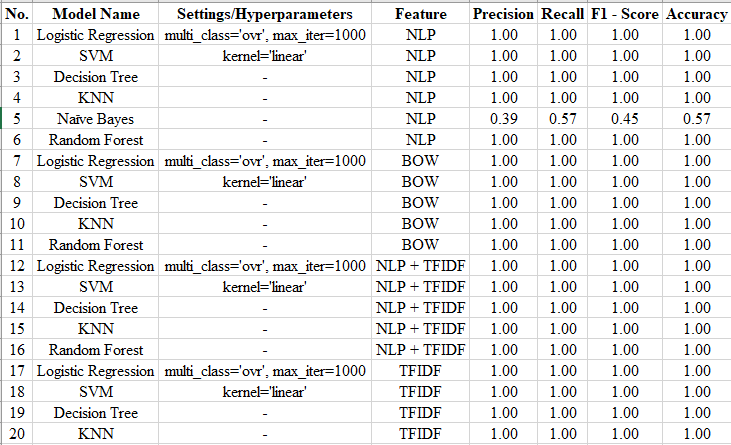

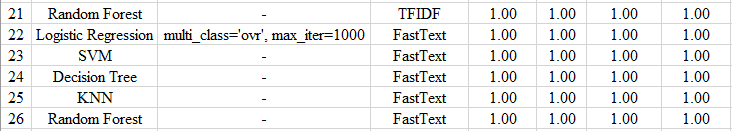